# Fast and High Quality Highlight Removal from A Single Image 

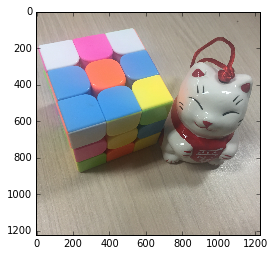

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq,kmeans,kmeans2,whiten

from math import sqrt

def easyshow(src,title,ifcolorbar=True,cmap='gray'):
    gci=plt.imshow(src,cmap=cmap)
    plt.title(title)
    if ifcolorbar:
        plt.colorbar(gci)
    plt.show()
    return
# src_path = '/mnt/MEDIA/Projects/anti_reflection/ForAugmentation/article.original.jpg'
src_path = '/mnt/MEDIA/Projects/anti_reflection/cubiccat.jpg'
src_img = cv2.imread(src_path)
src_img = cv2.resize(src_img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
plt.show()

## get L2 chromatic for material clustering

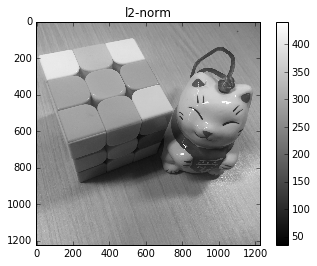

In [2]:
eps = 1e-5

l2norm_img = np.sqrt(np.sum(np.square(src_img.astype(np.float32)),axis=2,keepdims=False))
easyshow(l2norm_img,'l2-norm',True)

l2normed_img = np.divide(src_img,eps + np.expand_dims(l2norm_img,axis=2))
# assumpt that illumination is constant white 
ill_l2vec = np.tile(sqrt(1.0/3.0),(3,))
ill_l2img = np.tile(sqrt(1.0/3.0),src_img.shape)

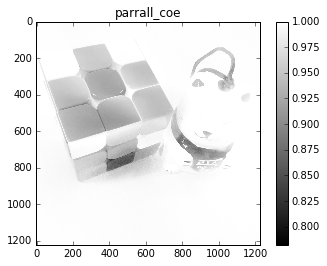

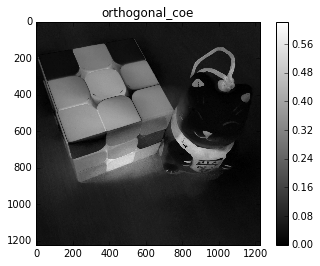

[[ 0.9996954   0.99970832  0.99967387 ...,  0.99967436  0.99966593
   0.99966593]
 [ 0.99970832  0.99963809  0.99966863 ...,  0.99961149  0.99966371
   0.99967717]
 [ 0.99970528  0.99965969  0.99963279 ...,  0.99961149  0.99964611
   0.99966079]
 ..., 
 [ 0.99956518  0.99948092  0.99945475 ...,  0.99954879  0.9995738
   0.99962345]
 [ 0.99950015  0.99951565  0.99951086 ...,  0.99955236  0.99965012
   0.99959923]
 [ 0.99956188  0.99952144  0.99955006 ...,  0.99952506  0.99953622
   0.99961509]]


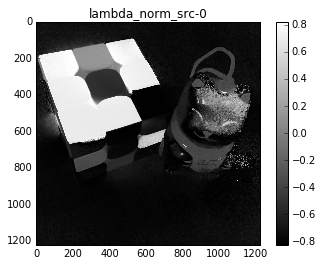

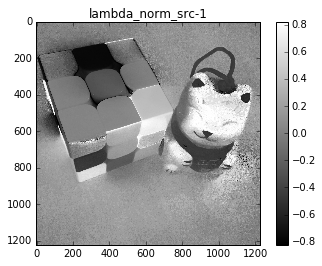

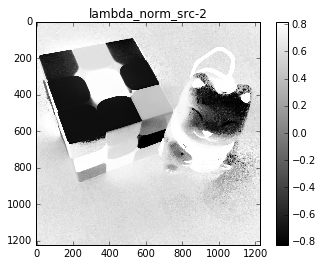

In [7]:

l2normed_pixels = l2normed_img.reshape((l2normed_img.shape[0] * l2normed_img.shape[1] ,l2normed_img.shape[2]))
parrall_coe = np.dot(l2normed_pixels,ill_l2vec.reshape(3,1)).clip(0,1)
orthogonal_coe = np.sqrt(1-np.square(parrall_coe))
easyshow(parrall_coe.reshape(l2norm_img.shape),'parrall_coe',True)
easyshow(orthogonal_coe.reshape(l2norm_img.shape),'orthogonal_coe',True)

lambda_ini = l2normed_img - np.expand_dims(parrall_coe.reshape(l2norm_img.shape)*sqrt(1.0/3.0),axis=2)
lambda_norm_src = np.stack([lambda_ini[:,:,i]/(eps + orthogonal_coe.reshape(l2norm_img.shape)) for i in range(3)],axis=2)


# easyshow(lambda_ini[:,:,0],'lambda_ini-0',True)
# easyshow(lambda_ini[:,:,1],'lambda_ini-1',True)
# easyshow(lambda_ini[:,:,2],'lambda_ini-2',True)
easyshow(lambda_norm_src[:,:,0],'lambda_norm_src-0',True)
easyshow(lambda_norm_src[:,:,1],'lambda_norm_src-1',True)
easyshow(lambda_norm_src[:,:,2],'lambda_norm_src-2',True)


## material clustering 

shape of l2chromatic_pixels is:  (1498176, 3)
tring to do 2-means clustering
tring to do 2-means clustering
[[-0.69332297  0.08250049  0.61082248]
 [-0.69332297  0.08250049  0.61082248]
 [-0.69332297  0.08250049  0.61082248]
 ..., 
 [-0.69332297  0.08250049  0.61082248]
 [-0.69332297  0.08250049  0.61082248]
 [-0.69332297  0.08250049  0.61082248]]


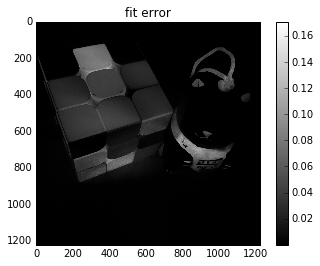

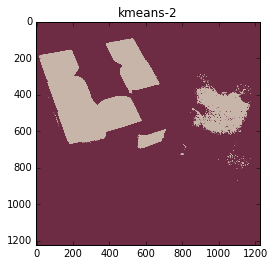

17609/1498176 pixels are not "near" circle, ratio is 0.011754
2-means clustering and analysis cost 4.799912s
tring to do 3-means clustering
tring to do 3-means clustering
[[-0.7559348   0.17551986  0.58041494]
 [-0.7559348   0.17551986  0.58041494]
 [-0.7559348   0.17551986  0.58041494]
 ..., 
 [-0.7559348   0.17551986  0.58041494]
 [-0.7559348   0.17551986  0.58041494]
 [-0.7559348   0.17551986  0.58041494]]


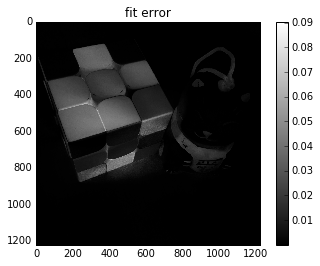

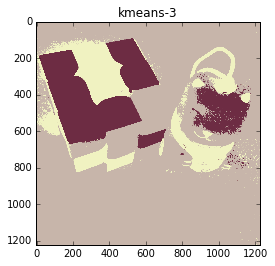

8/1498176 pixels are not "near" circle, ratio is 0.000005
3-means clustering and analysis cost 5.098598s
tring to do 4-means clustering
tring to do 4-means clustering
[[-0.75946768  0.15318435  0.60628332]
 [-0.75946768  0.15318435  0.60628332]
 [-0.75946768  0.15318435  0.60628332]
 ..., 
 [-0.75946768  0.15318435  0.60628332]
 [-0.75946768  0.15318435  0.60628332]
 [-0.75946768  0.15318435  0.60628332]]


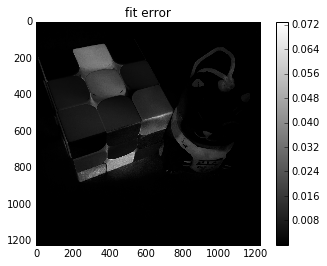

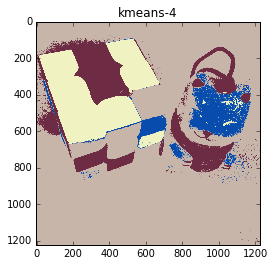

0/1498176 pixels are not "near" circle, ratio is 0.000000
4-means clustering and analysis cost 5.137478s
tring to do 5-means clustering
tring to do 5-means clustering
[[-0.75314371  0.11919573  0.63394797]
 [-0.75314371  0.11919573  0.63394797]
 [-0.75314371  0.11919573  0.63394797]
 ..., 
 [-0.75314371  0.11919573  0.63394797]
 [-0.75314371  0.11919573  0.63394797]
 [-0.75314371  0.11919573  0.63394797]]


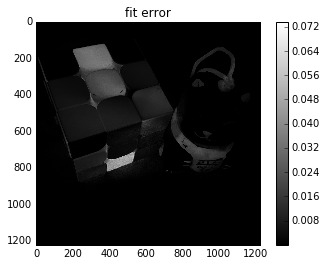

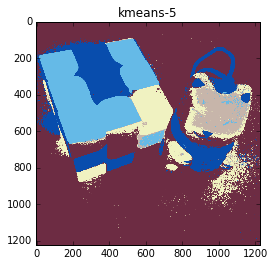

0/1498176 pixels are not "near" circle, ratio is 0.000000
5-means clustering and analysis cost 5.572521s
tring to do 6-means clustering
tring to do 6-means clustering
[[-0.66406961 -0.06704003  0.73110964]
 [-0.66406961 -0.06704003  0.73110964]
 [-0.66406961 -0.06704003  0.73110964]
 ..., 
 [-0.66406961 -0.06704003  0.73110964]
 [-0.66406961 -0.06704003  0.73110964]
 [-0.66406961 -0.06704003  0.73110964]]


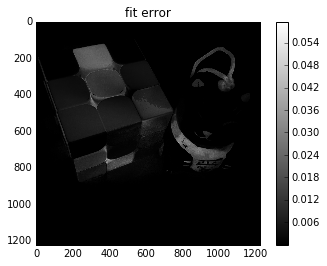

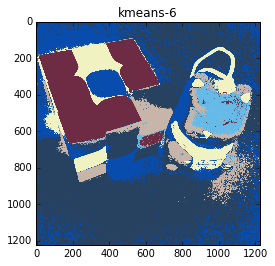

0/1498176 pixels are not "near" circle, ratio is 0.000000
6-means clustering and analysis cost 5.612154s
tring to do 7-means clustering
tring to do 7-means clustering
[[-0.72401986  0.04111581  0.68290405]
 [-0.72401986  0.04111581  0.68290405]
 [-0.72401986  0.04111581  0.68290405]
 ..., 
 [-0.72401986  0.04111581  0.68290405]
 [-0.72401986  0.04111581  0.68290405]
 [-0.72401986  0.04111581  0.68290405]]


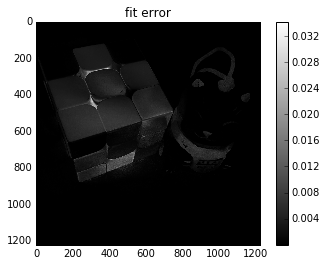

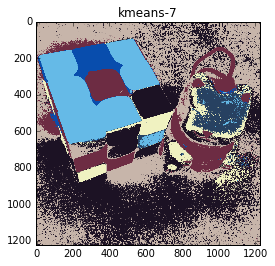

0/1498176 pixels are not "near" circle, ratio is 0.000000
7-means clustering and analysis cost 5.966855s
tring to do 8-means clustering
tring to do 8-means clustering
[[-0.72275297  0.03825578  0.68449719]
 [-0.72275297  0.03825578  0.68449719]
 [-0.72275297  0.03825578  0.68449719]
 ..., 
 [-0.72275297  0.03825578  0.68449719]
 [-0.72275297  0.03825578  0.68449719]
 [-0.72275297  0.03825578  0.68449719]]


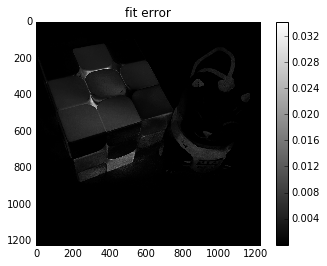

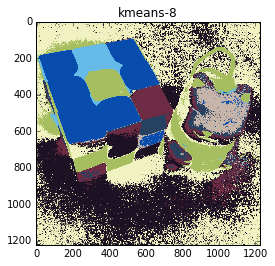

0/1498176 pixels are not "near" circle, ratio is 0.000000
8-means clustering and analysis cost 6.160361s
tring to do 9-means clustering
tring to do 9-means clustering
[[-0.74953056  0.09673309  0.65279747]
 [-0.74953056  0.09673309  0.65279747]
 [-0.67355351 -0.05881155  0.73236506]
 ..., 
 [-0.67355351 -0.05881155  0.73236506]
 [-0.67355351 -0.05881155  0.73236506]
 [-0.67355351 -0.05881155  0.73236506]]


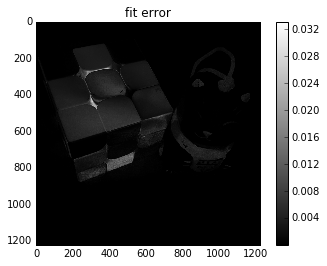

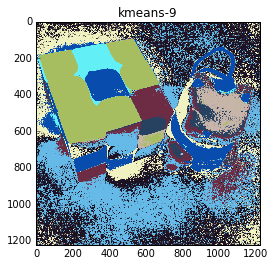

0/1498176 pixels are not "near" circle, ratio is 0.000000
9-means clustering and analysis cost 6.390288s


In [6]:
import time
k_ini = 2
k_max = 10


tfe_thr = 0.1

out_circle_thr = 0.08
out_circle_ratio_thr = 0.05



def get_random_color():
    return np.random.uniform(0,255,(3,)).astype(np.uint8)
kmeans_res_4show = np.zeros_like(lambda_norm_src).astype(np.uint8)
colors = [get_random_color() for i in range(k_max)]



l2chromatic_pixels = lambda_norm_src.reshape((lambda_norm_src.shape[0] * lambda_norm_src.shape[1],lambda_norm_src.shape[2]))

print 'shape of l2chromatic_pixels is: ',l2chromatic_pixels.shape

for k in range(k_ini,k_max):
    tic = time.time()
    while True:
        try:
            print 'tring to do %d-means clustering'%k
            centors,labels = kmeans2(l2chromatic_pixels, k, iter=50, thresh=1e-05, minit='points', missing='raise', check_finite=True)
        except:
            print 'error occur during kmeans'
        else:
            print 'tring to do %d-means clustering'%k
            break
    
    # reproject to get coes, then compare total fitting error
    centors_l2chromatic_pixels = np.array(map(lambda x:centors[x].tolist(),labels.tolist()))
    
    print centors_l2chromatic_pixels
    # project to gamma_orth, gamma_par
    gamma_orth = np.sum(centors_l2chromatic_pixels * l2normed_pixels,axis=1,keepdims=False)
    gamma_par = np.sum(l2normed_pixels * np.sqrt(1.0/3.0),axis=1,keepdims=False)
    
    easyshow(abs(np.square(gamma_orth) + np.square(gamma_par) - 1.0).reshape(l2norm_img.shape),'fit error',True)

#     easyshow(gamma_orth.reshape(l2norm_img.shape),'gamma_orth',True)    
#     easyshow(gamma_par.reshape(l2norm_img.shape),'gamma_par',True)
    
    # show kmeans result 
    for i in range(l2chromatic_pixels.shape[0]):
        row = i // lambda_norm_src.shape[1]
        col = i % lambda_norm_src.shape[1]
        kmeans_res_4show[row,col,:] = colors[labels[i]]
    
    gci=plt.imshow(cv2.cvtColor((0.7*src_img.astype(kmeans_res_4show.dtype) + 0.3*kmeans_res_4show).astype(np.uint8), cv2.COLOR_BGR2RGB))
    gci=plt.imshow(cv2.cvtColor(kmeans_res_4show.astype(np.uint8), cv2.COLOR_BGR2RGB))

    plt.title('kmeans-%d'%k)
    plt.show()
    # end of show kmeans result
    tf_err_num =np.count_nonzero(abs(np.square(gamma_orth) + np.square(gamma_par) - 1.0) > out_circle_thr)
    ratio = float(tf_err_num) / float(gamma_orth.shape[0])
    print '%d/%d pixels are not "near" circle, ratio is %f'%(tf_err_num,gamma_orth.shape[0],ratio)
    tac = time.time()
    print '%d-means clustering and analysis cost %fs'%(k,tac-tic)
#     if ratio < out_circle_ratio_thr:
#         break

In [ ]:
import scipy 

In [ ]:
print scipy.__version__